In [1]:
# toy map example
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read file, data here: https://gist.githubusercontent.com/claytonrsh/76313da528e1116a959d7401b8b7afed/raw/8247f2fcf3fb08aa1f3aa7b236fba3013602dc9d/kcmo_counties.geojson
gdf = gpd.read_file('kcmo_counties.geojson')

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
val         9 non-null float64
geometry    9 non-null object
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


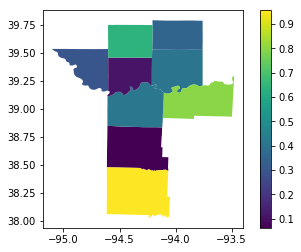

In [4]:
gdf.plot('val', legend=True) # fine

legend object type: <class 'NoneType'>


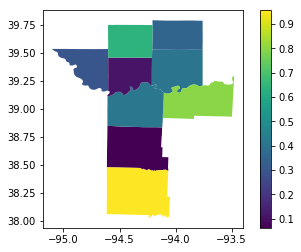

In [5]:
ax = gdf.plot('val', legend=True)
leg = ax.get_legend()
print('legend object type: ' + str(type(leg)))
plt.show()

In [6]:
# https://stackoverflow.com/questions/33762891/how-to-change-the-text-of-the-legend-of-a-choropleth-map-in-python
# since NoneType, clearly cannot .get_texts()..
leg.get_texts()

AttributeError: 'NoneType' object has no attribute 'get_texts'

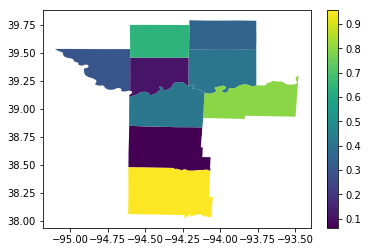

In [8]:
f, ax = plt.subplots()
gdf.plot('val', legend=True, ax=ax)
handles, labels = ax.get_legend_handles_labels()

In [9]:
# another option found somewhere (lost actual reference, sorry...)
type(handles), type(labels)

(list, list)

In [10]:
# but, just empty lists since presumably since there is no ax.legend object
len(handles), len(labels)

(0, 0)

In [11]:
# try passing labels as legend_kwds as _seems_ maybe possible from source code...

# create number of tick marks in legend and set location to display them
import numpy as np
numpoints = 5
leg_ticks = np.linspace(-1,1,numpoints)

# create labels based on number of tickmarks
leg_min = gdf['val'].min()
leg_max = gdf['val'].max()
leg_tick_labels = [str(round(x*100,1))+'%' for x in np.linspace(leg_min,leg_max,numpoints)]

leg_kwds_dict = {'numpoints': numpoints, 'labels': leg_tick_labels}

AttributeError: Unknown property legend_kwds

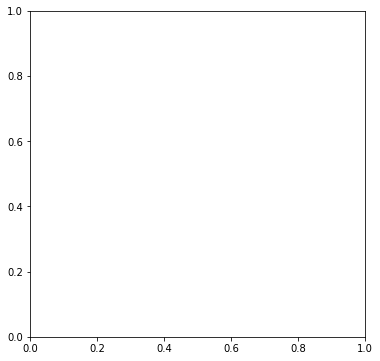

In [12]:
f, ax = plt.subplots(1, figsize=(6,6))
gdf.plot('val', legend=True, ax=ax, legend_kwds=leg_kwds_dict)

In [13]:
print(gdf.plot.__doc__)


    Plot a GeoDataFrame.

    Generate a plot of a GeoDataFrame with matplotlib.  If a
    column is specified, the plot coloring will be based on values
    in that column.

    Parameters
    ----------

    df : GeoDataFrame
        The GeoDataFrame to be plotted.  Currently Polygon,
        MultiPolygon, LineString, MultiLineString and Point
        geometries can be plotted.

    column : str (default None)
        The name of the column to be plotted. Ignored if `color` is also set.

    cmap : str (default None)
        The name of a colormap recognized by matplotlib.

    categorical : bool (default False)
        If False, cmap will reflect numerical values of the
        column being plotted.  For non-numerical columns, this
        will be set to True.

    color : str (default None)
        If specified, all objects will be colored uniformly.

    legend : bool (default False)
        Plot a legend. Ignored if no `column` is given, or if `color` is given.

    ax : matplot

In [14]:
print(gpd.plotting.plot_dataframe.__doc__)


    Plot a GeoDataFrame.

    Generate a plot of a GeoDataFrame with matplotlib.  If a
    column is specified, the plot coloring will be based on values
    in that column.

    Parameters
    ----------

    df : GeoDataFrame
        The GeoDataFrame to be plotted.  Currently Polygon,
        MultiPolygon, LineString, MultiLineString and Point
        geometries can be plotted.

    column : str (default None)
        The name of the column to be plotted. Ignored if `color` is also set.

    cmap : str (default None)
        The name of a colormap recognized by matplotlib.

    categorical : bool (default False)
        If False, cmap will reflect numerical values of the
        column being plotted.  For non-numerical columns, this
        will be set to True.

    color : str (default None)
        If specified, all objects will be colored uniformly.

    legend : bool (default False)
        Plot a legend. Ignored if no `column` is given, or if `color` is given.

    ax : matplot